In [1]:
from IPython.display import Image
import seaborn as sns

### Q1. (15pts) 

（Solve by hand)

Given the following learned Bayesian network structure explaining the relationships

between variables in container shipping data:

In [2]:
Image('Q1.png')

1) Which of the following conditional independence relationships hold? Choose

“Independent” or “Dependent” for each (6 points):

CI (Shipper Name, Value | F Port)?

CI (Shipper Name, Value | Shipping Line)? 

CI (Foreign Port, Commodity | Country)? 

CI (Foreign Port, Commodity | County, Weight)? 

### Answer


CI (Shipper Name, Value | F Port) - **Dependent**

CI (Shipper Name, Value | Shipping Line) - **Independent**

CI (Foreign Port, Commodity | Country) - **Independent**

CI (Foreign Port, Commodity | County, Weight) - **Dependent**

2) Now consider a smaller dataset with only four discrete attributes (Shipping Line, US

Port, Foreign Port, Weight), and the following conditional probability distributions:

Shipping Line: CSCO (70%), ASCO (30%)

Foreign Port | Shipping Line = CSCO: Yokohama (40%), Vancouver (60%)

Foreign Port | Shipping Line = ASCO: Vancouver (100%)

US Port | Shipping Line = ASCO: Seattle (100%)

US Port | Shipping Line = CSCO: Seattle (10%), Los Angeles (90%)

Weight | Shipping Line = ASCO, Foreign Port = Vancouver: Light (30%), Medium (50%), Heavy (20%)

Weight | Shipping Line = CSCO, Foreign Port = Vancouver: Light (15%), Medium (70%), Heavy (15%)

Weight | Shipping Line = CSCO, Foreign Port = Yokohama: Light (10%), Medium (30%), Heavy (60%)

Which of the following packages is most anomalous?

a) A heavy package shipped from Vancouver to Seattle by ASCO

b) A heavy package shipped from Vancouver to Seattle by CSCO

c) A heavy package shipped from Yokohama to Los Angeles by CSCO

To answer this question, compute the likelihood of each package given the Bayesian Network (lowest likelihood = most anomalous). You must show your calculations to receive credit. (9 points)

#### a) A heavy package shipped from Vancouver to Seattle by ASCO

#### Pr(Shipping Line = ASCO, Foreign Port = Vancouver, US Port = Seattle, Weight = Heavy) = 
                         Pr(ASCO)*
                         Pr(Foreign Port = Vancouver | Shipping Line = ASCO)*
                         Pr(US Port = Seattle | Shipping Line = ASCO)* 
                         Pr(Weight = Heavy | Shipping Line = ASCO, Foreign Port = Vancouver)

Pr(ASCO) = 0.3 or 30%

Pr(Foreign Port = Vancouver | Shipping Line = ASCO) = 1.0 or 100%

Pr(US Port = Seattle | Shipping Line = ASCO) = 1.0 or 100%

Pr(Weight = Heavy | Shipping Line = ASCO, Foreign Port = Vancouver) = 0.2 or 20% 

In [3]:
print("The Likelihood of a heavy package shipped from Vancouver to Seattle by ASCO is {0}".\
      format(0.3* 1.0* 1.0* 0.2))

The Likelihood of a heavy package shipped from Vancouver to Seattle by ASCO is 0.06


### b) A heavy package shipped from Vancouver to Seattle by CSCO

#### Pr(Shipping Line = CSCO, Foreign Port = Vancouver, US Port = Seattle, Weight = Heavy) =
                        Pr(CSCO)*
                        Pr(Foreign Port = Vancouver | Shipping Line = CSCO)*
                        Pr(US Port = Seattle | Shipping Line = CSCO)* 
                        Pr(Weight = Heavy | Shipping Line = CSCO, Foreign Port = Vancouver)
                        
Pr(CSCO) = 0.7 or 70%

Pr(Foreign Port = Vancouver | Shipping Line = CSCO) = 0.6 or 60% 

Pr(US Port = Seattle | Shipping Line = CSCO) = 0.1 or 10%

Pr(Weight = Heavy | Shipping Line = CSCO, Foreign Port = Vancouver) = 0.15 or 15%

In [4]:
print("The Likelihood of a heavy package shipped from Vancouver to Seattle by CSCO is {0}"\
      .format(0.7* 0.6* 0.1* 0.15))

The Likelihood of a heavy package shipped from Vancouver to Seattle by CSCO is 0.0063


#### c) A heavy package shipped from Yokohama to Los Angeles by CSCO

#### Pr(Shipping Line = CSCO, Foreign Port = Yokohama, US Port = Los Angeles, Weight = Heavy) = 
                          Pr(CSCO)*
                          Pr(Foreign Port = Yokohama | Shipping Line = CSCO)*
                          Pr(US Port = Los Angeles | Shipping Line = CSCO)* 
                          Pr(Weight = Heavy | Shipping Line = CSCO, Foreign Port = Yokohama)
                          
Pr(CSCO) = 0.7 or 70%

Pr(Foreign Port = Yokohama | Shipping Line = CSCO) = 0.4 or 40% 

Pr(US Port = Los Angeles | Shipping Line = CSCO) = 0.9 or 90%

Pr(Weight = Heavy | Shipping Line = CSCO, Foreign Port = Yokohama) = 0.6 or 60%

In [5]:
print("The Likelihood of a heavy package shipped from Yokohama to Los Angeles by CSCO is {0}"\
      .format(0.7* 0.4* 0.9* 0.6))

The Likelihood of a heavy package shipped from Yokohama to Los Angeles by CSCO is 0.1512


#####  The lowest likelihood is the most anomalous

#### A heavy package shipped from Vancouver to Seattle by CSCO is the most anomalous. 

### Q2. Bayesian Network Learning (35pts)

In this question, we use data: "Q2.csv" for Bayesian Network Learning.

In [15]:
import pandas as pd
data2=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/Q2.csv")
from sklearn.cross_validation import train_test_split
train,test=train_test_split(data2,random_state=100,test_size=0.4)

In [16]:
data2.head()

,A,B,C,D,E,F,G,H
0,2,1,0,0,1,0,1,3
1,4,1,1,2,0,1,0,4
2,3,2,0,0,0,2,0,3
3,4,1,0,0,2,1,2,7
4,5,1,1,2,1,0,2,8


### a) Use the training data to select the best structure you want to use for Bayesian Network Learning. Please use Hill Climbing with BIC score metric. (10pts)


In [17]:
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch

hc = HillClimbSearch(train, scoring_method=BicScore(train))
best_model = hc.estimate(tabu_length = 180)
print(best_model.edges())

[('A', 'C'), ('A', 'H'), ('A', 'D'), ('B', 'A'), ('H', 'G')]


### b) Use Bayesian Estimator to estimate the CPDs for your model and visulize the network with CPDs. (15pts)

In [20]:
from pgmpy.estimators import BayesianEstimator

best_model.fit(train, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=5)
for cpd in best_model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)

CPD of A:
╒══════╤═══════════════════════╤════════════════════════╤════════════════════════╕
│ B    │ B(0)                  │ B(1)                   │ B(2)                   │
├──────┼───────────────────────┼────────────────────────┼────────────────────────┤
│ A(0) │ 0.032616005379959644  │ 0.00032509752925877764 │ 0.00033557046979865765 │
├──────┼───────────────────────┼────────────────────────┼────────────────────────┤
│ A(1) │ 0.0729657027572293    │ 0.008127438231469442   │ 0.00033557046979865765 │
├──────┼───────────────────────┼────────────────────────┼────────────────────────┤
│ A(2) │ 0.14761264290517817   │ 0.051040312093628096   │ 0.018456375838926172   │
├──────┼───────────────────────┼────────────────────────┼────────────────────────┤
│ A(3) │ 0.22629455279085403   │ 0.1778283485045514     │ 0.06677852348993286    │
├──────┼───────────────────────┼────────────────────────┼────────────────────────┤
│ A(4) │ 0.25857431069266973   │ 0.25780234070221064    │ 0.15134228187919463

### c) Use the model to predict "A" using the testing dataset. Report the OS prediction accuracy. (10pts)   

In [21]:
print("The OS prediction accuracy is {}".format(
    (best_model.predict(test.loc[:,['B','C','D','G','H']]).A == test.A).sum()*1.0/len(test)))

The OS prediction accuracy is 0.498


### Q3. Clustering: Spatial and Temporal Distributions of Chicago Crimes (50pts)
In this question, you will use k-means clustering in sklearn and Hierarchical Clustering in Scipy to answer the question, “Do different types of crime display different trends over space and time?”  The dataset “Q3.csv” consists of data for 119 different types of crime, each of which occurred at least 100 times in Chicago during the year 2016.  For each crime type, we have various features representing the spatial and temporal distribution of crime, including:

-The proportion of all crimes of that type that occurred on each day of the week (day_Sun, day_Mon, …, day_Sat).

-The proportion of all crimes of that type that occurred on each hour of the day (hour_0 = midnight to 12:59am, hour_1 = 1am to 1:59am, …, hour_23 = 11pm to 11:59pm).

-The proportion of all crime of that type that occurred in each of the 77 community areas of Chicago (community_area_1 … community_area_77).

We also have, for each crime type, its categorization by the FBI:

-Category = “P1V” corresponds to Part 1 Violent Crime, i.e., serious violent crimes

-Category = “P1P” corresponds to Part 1 Property Crime, i.e., serious property crimes

-Category = “P2” corresponds to Part 2 (less serious) crimes.

For parts a-f, you should cluster the 119 crime types into k = 3 clusters using only the hour of day attributes using k-means clustering in sklearn and hierarchical clustering clustering in scipy.

a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster.  (5 pts)

b) Describe the three different hour-of-day trends represented by these three clusters (5 pts).

c) Do you notice any consistent trends about which crime types are assigned to which cluster?  Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (5 pts)  

d) Do the three clusters have different day-of-week trends?  Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences.  (5 pts)

e) Do the three clusters affect different types of communities/neighborhoods?  To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster.  You can then use the provided file(data4), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.).  (5 pts)

f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5 pts)

g) For part g, you will use the same dataset to compare the clusters produced by several different methods.  But this time you should cluster using only the _day-of-week_ (not hour-of-day) attributes.  Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric.  In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify).  For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings. (20 pts)


In [22]:
#Use package from sklearn.
from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import numpy as np
%matplotlib inline

In [23]:
data3=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/Q3.csv")

In [24]:
data3.head()

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,...,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
0,ARSON: BY FIRE,P1P,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,...,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0.055556,...,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0.040630,...,0.035377,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,P1V,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,0.034000,...,0.028000,0.030000,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000
4,ASSAULT: AGGRAVATED: OTHER FIREARM,P1V,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,0.009804,...,0.029412,0.019608,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000


In [25]:
## Consider only the hour of th day 
data_hour = data3.iloc[:,9:33]
data_hour.head()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.073654,0.079320,0.076487,0.087819,0.082153,0.073654,0.039660,0.033994,0.014164,0.016997,...,0.019830,0.019830,0.025496,0.022663,0.022663,0.053824,0.033994,0.033994,0.042493,0.062323
1,0.055556,0.070370,0.033333,0.014815,0.025926,0.003704,0.007407,0.014815,0.018519,0.029630,...,0.055556,0.077778,0.048148,0.059259,0.044444,0.044444,0.077778,0.044444,0.074074,0.044444
2,0.040630,0.039580,0.033275,0.036778,0.018564,0.014011,0.012609,0.021366,0.025569,0.034676,...,0.055342,0.052189,0.059895,0.056392,0.062347,0.051839,0.053240,0.066550,0.055692,0.056042
3,0.034000,0.026000,0.018000,0.009000,0.010000,0.015000,0.020000,0.017000,0.033000,0.036000,...,0.045000,0.058000,0.073000,0.078000,0.068000,0.066000,0.059000,0.038000,0.051000,0.041000
4,0.009804,0.009804,0.029412,0.009804,0.009804,0.019608,0.039216,0.019608,0.000000,0.029412,...,0.029412,0.009804,0.107843,0.117647,0.058824,0.068627,0.078431,0.068627,0.049020,0.088235


### a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster. (5 pts)

In [26]:
## K-means clustering 
nc = 3 ## number of clusters 
kmeans_cluster = KMeans(n_clusters=nc, random_state=324).fit(data_hour) ## fit the data to model
## assign the cluster labels to the dataframe
data_hour['Cluster_labels'] = kmeans_cluster.labels_

##### The clustering would be different with different random_state input. 
The interpretation of the clustering is based on the clusters formed in this state. The inferences might be different for different clusters formed by different random_state.

In [27]:
kmeans_cluster.labels_

array([0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2], dtype=int32)

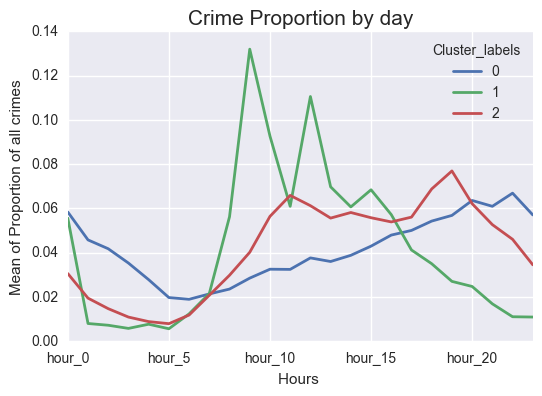

In [28]:
## plot the mean of each hour for each of the three clusters
fig=plt.figure(figsize = (30,10))
data_hour.groupby(by=data_hour['Cluster_labels']).mean().T.plot(lw='2')
plt.xlabel('Hours ')
plt.ylabel('Mean of Proportion of all crimes')
plt.title('Crime Proportion by day', fontsize = 15)
plt.show()

#### Figure 1: Chicago Crime proportions by hour for the three clusters 

### b) Describe the three different hour-of-day trends represented by these three clusters (5 pts).

- The first cluster has high values during the night time from 8:00 p.m till 2:00 a.m and peaks around midnight with 0.06 crime proportion. The crime proportion decreases post 2:00 a.m and is the lowest at 5:00 a.m with 0.02 crime proportion. This cluster indicates that the crimes are happening in the dark i.e during the night time. 

- The second cluster has peak during the day time and spikes around 8:00 a.m and the next spike is around noon. There is steep drop in between the two peaks and further shows a decreasing trend after 3:00 p.m. This cluster has approximately zero crimes during 1:00 a.m. and 5:00 a.m suggesting low or almost no crime happening during the night time while all the crime happening during the day. 

- The third cluster has a peak around 7:00 pm and has high of 0.06 crime proportion. The crime proportion is low (approximately zero) from 1:00 a.m. to 5:00 a.m. and after that shows a   increasing trend throughout the whole day until it reaches the peak in the late evening. 

The second cluster has the highest crime proportion among all the three clusters. It can also be observed that all the threee clusters have low crimes during the late night times (1:00 a.m to 5:00 a.m) compared to the day time crime proportions. The first cluster has highest crimes during late night as compared to other two clusters indicating the crimes types happening in this cluster are majority crimes that happen in dark, whereas the second and the thrid clusters have crime types happening during the day time. 


### c) Do you notice any consistent trends about which crime types are assigned to which cluster? Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (5 pts

In [29]:
data3['cluster_label'] = data_hour['Cluster_labels']

In [30]:
## Cluster 1 
data3[['crime_type', 'cluster_label']][data3[['crime_type', 'cluster_label']].\
                                       cluster_label == 0]

,crime_type,cluster_label
0,ARSON: BY FIRE,0
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,0
2,ASSAULT: AGGRAVATED: HANDGUN,0
4,ASSAULT: AGGRAVATED: OTHER FIREARM,0
5,ASSAULT: AGGRAVATED:KNIFE/CUTTING INSTR,0
8,BATTERY: AGG PO HANDS NO/MIN INJURY,0
10,BATTERY: AGG: HANDS/FIST/FEET SERIOUS INJURY,0
11,BATTERY: AGGRAVATED DOMESTIC BATTERY: HANDS/FI...,0
12,BATTERY: AGGRAVATED DOMESTIC BATTERY: KNIFE/CU...,0
13,BATTERY: AGGRAVATED DOMESTIC BATTERY: OTHER DA...,0


#### The first cluster has some serious crimes such as Robbery, Assult, Narcotics, ciminal damage, etc. These crimes are mostly happening during the night time from figure 1. 

In [31]:
## Cluster 2
(data3[['crime_type', 'cluster_label']][data3[['crime_type', 'cluster_label']].\
                                       cluster_label == 1])

,crime_type,cluster_label
6,ASSAULT: PRO EMP HANDS NO/MIN INJURY,1
19,BATTERY: PRO EMP HANDS NO/MIN INJURY,1
36,DECEPTIVE PRACTICE: ATTEMPT - FINANCIAL IDENTI...,1
37,DECEPTIVE PRACTICE: BOGUS CHECK,1
38,DECEPTIVE PRACTICE: COUNTERFEIT CHECK,1
41,DECEPTIVE PRACTICE: FINANCIAL IDENTITY THEFT $...,1
42,DECEPTIVE PRACTICE: FINANCIAL IDENTITY THEFT O...,1
43,DECEPTIVE PRACTICE: FORGERY,1
44,DECEPTIVE PRACTICE: FRAUD OR CONFIDENCE GAME,1
45,DECEPTIVE PRACTICE: ILLEGAL USE CASH CARD,1


#### The second Cluster has minor crimes such as Deceptive Practice. 

In [32]:
## Cluster 3 
data3[['crime_type', 'cluster_label']][data3[['crime_type', 'cluster_label']].\
                                       cluster_label == 2]

,crime_type,cluster_label
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,2
7,ASSAULT: SIMPLE,2
9,BATTERY: AGG: HANDS/FIST/FEET NO/MINOR INJURY,2
14,BATTERY: AGGRAVATED OF A SENIOR CITIZEN,2
22,BURGLARY: FORCIBLE ENTRY,2
24,BURGLARY: UNLAWFUL ENTRY,2
32,CRIMINAL TRESPASS: TO LAND,2
33,CRIMINAL TRESPASS: TO RESIDENCE,2
34,CRIMINAL TRESPASS: TO STATE SUP LAND,2
39,DECEPTIVE PRACTICE: COUNTERFEITING DOCUMENT,2


#### The third cluster has majority Narcotics, theft and other offenses. 

- Cluster 1 is mainly assault, battery
- Cluster 2 is mainly minor crimes
- Cluster 3 is mainly narcotics/fraud

### d) Do the three clusters have different day-of-week trends? Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences. (5 pts)

In [33]:
## data by day of week 
data_week = data3.iloc[:,2:9]
data_week.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat
0,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972
1,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185
2,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776
3,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000
4,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275


In [34]:
data_week['Cluster_labels'] = data_hour['Cluster_labels']

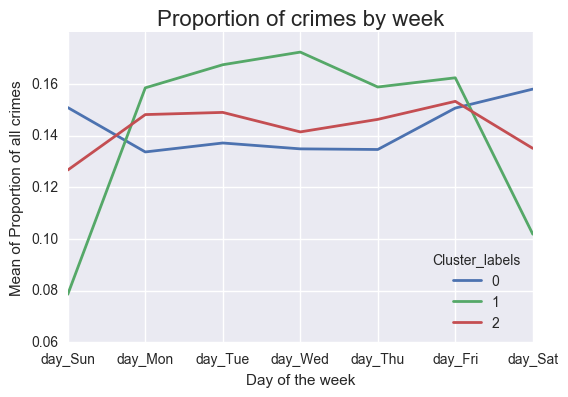

In [35]:
## plot the day of week clustering 
fig=plt.figure(figsize = (30,10))
data_week.groupby(by=data_week['Cluster_labels']).mean().T.plot(lw='2')
plt.xlabel('Day of the week')
plt.ylabel('Mean of Proportion of all crimes')
plt.title('Proportion of crimes by week', fontsize = 16)

#### Figure 2: Crime proportions by day of week. 

Cluster 0 (Major crimes) are more during the weekends. Crimes in cluster 1 and 2 are follow a almost similar trend during the weekdays. The crimes within the clusters 1 and 2 show peaks at friday.

All the three clusters have their peaks around 0.14 to 0.18 


### e) Do the three clusters affect different types of communities/neighborhoods? To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster. You can then use the provided file(data4), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.). (5 pts)¶

In [36]:
community = data3.groupby(by=data3['cluster_label']).mean()
community.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,hour_1,hour_2,...,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,0.150886,0.133700,0.137165,0.134891,0.134649,0.150685,0.158025,0.058410,0.045807,0.041814,...,0.027000,0.028354,0.009691,0.029029,0.002729,0.010119,0.001482,0.006931,0.003044,0.006753
1,0.078582,0.158511,0.167456,0.172347,0.158838,0.162397,0.101868,0.055639,0.008051,0.007266,...,0.019251,0.017245,0.012690,0.022950,0.005480,0.010236,0.003683,0.010348,0.011947,0.013122
2,0.126694,0.148161,0.149006,0.141457,0.146310,0.153289,0.135084,0.030613,0.019505,0.014753,...,0.028041,0.027521,0.005594,0.029390,0.002722,0.012186,0.002132,0.007710,0.012571,0.006738


In [37]:
community = community.iloc[:,31:].T
community.head()

cluster_label,0,1,2
community_area_1,0.013562,0.012528,0.012591
community_area_2,0.012788,0.013536,0.010208
community_area_3,0.012691,0.017650,0.012409
community_area_4,0.006845,0.011505,0.006358
community_area_5,0.004130,0.010555,0.002986


In [38]:
## Calculate the proportion of clusters in each community. 
community['sum'] = community[0] + community[1] + community[2]
community['Cluster0'] = (community[0]/community['sum']) * 100
community['Cluster1'] = (community[1]/community['sum']) * 100
community['Cluster2'] = (community[2]/community['sum']) * 100
community.head()

cluster_label,0,1,2,sum,Cluster0,Cluster1,Cluster2
community_area_1,0.013562,0.012528,0.012591,0.038681,35.061747,32.388831,32.549422
community_area_2,0.012788,0.013536,0.010208,0.036532,35.004722,37.052187,27.943091
community_area_3,0.012691,0.017650,0.012409,0.042751,29.686653,41.286668,29.026679
community_area_4,0.006845,0.011505,0.006358,0.024709,27.703589,46.563556,25.732855
community_area_5,0.004130,0.010555,0.002986,0.017672,23.373354,59.730575,16.896071


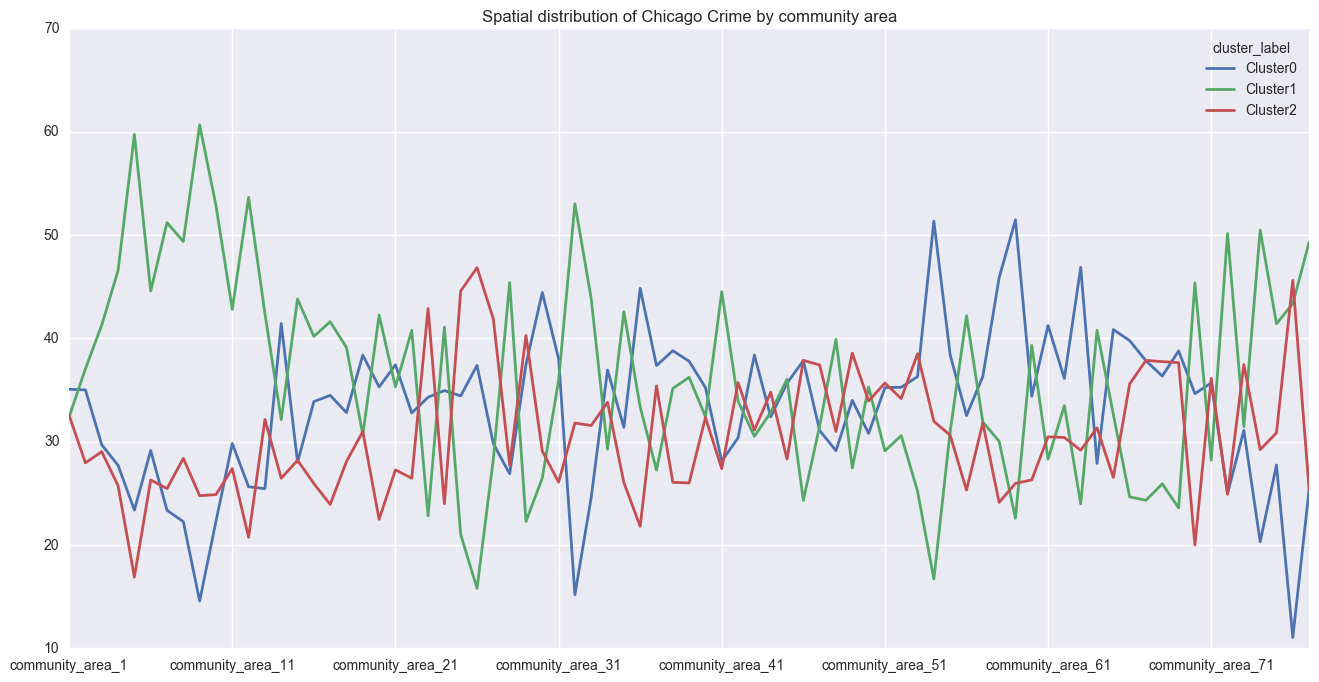

In [41]:
fig=plt.figure(figsize = (30,10))
community.iloc[:,4:].plot(figsize=(16,8), lw='2',\
                            title = 'Spatial distribution of Chicago Crime by community area')
plt.show()

#### Figure 3: Spatial Distribution of crime proportions(%) in each community area 

In [42]:
data4=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/Q3_2.csv")

In [43]:
data4.describe()

,Community Area Number,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
count,77.000000,7.700000e+01,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,1.163753e+06,1.884761e+06,4.923377,21.766234,15.372727,20.341558,35.746753,25563.168831,12.442935,3262.246753
std,22.371857,1.891460e+04,3.595371e+04,3.682887,11.529957,7.543412,11.823152,7.327716,15293.098259,5.837773,2790.716590
min,1.000000,1.106851e+06,1.818033e+06,0.300000,3.300000,4.700000,2.500000,13.500000,8201.000000,4.427736,283.000000
25%,20.000000,1.151302e+06,1.857000e+06,2.300000,13.200000,9.200000,11.800000,32.000000,15754.000000,8.600422,1229.000000
50%,39.000000,1.164978e+06,1.881505e+06,3.800000,18.900000,13.900000,18.500000,38.100000,21323.000000,10.255709,2296.000000
75%,58.000000,1.178008e+06,1.916572e+06,6.800000,29.200000,20.000000,26.600000,40.500000,28887.000000,15.839488,4604.000000
max,77.000000,1.202111e+06,1.947667e+06,15.800000,56.500000,35.900000,54.800000,51.500000,88669.000000,29.411765,15719.000000


### Communities with Disproportional crimes 

The communities with greater crime proportions than 2 standard deviation are considered disproportional as 2 standard deviations is considered as 95% confidence interval and anything beyond mean + 2 $sigma is outlier communities.

In [44]:
mean = {}
two_sigma = {}
mean[0] = community.Cluster0.mean()
mean[1] = community.Cluster1.mean()
mean[2] = community.Cluster2.mean()
two_sigma[0] = community.Cluster0.std()*2
two_sigma[1] = community.Cluster1.std()*2
two_sigma[2] = community.Cluster2.std()*2

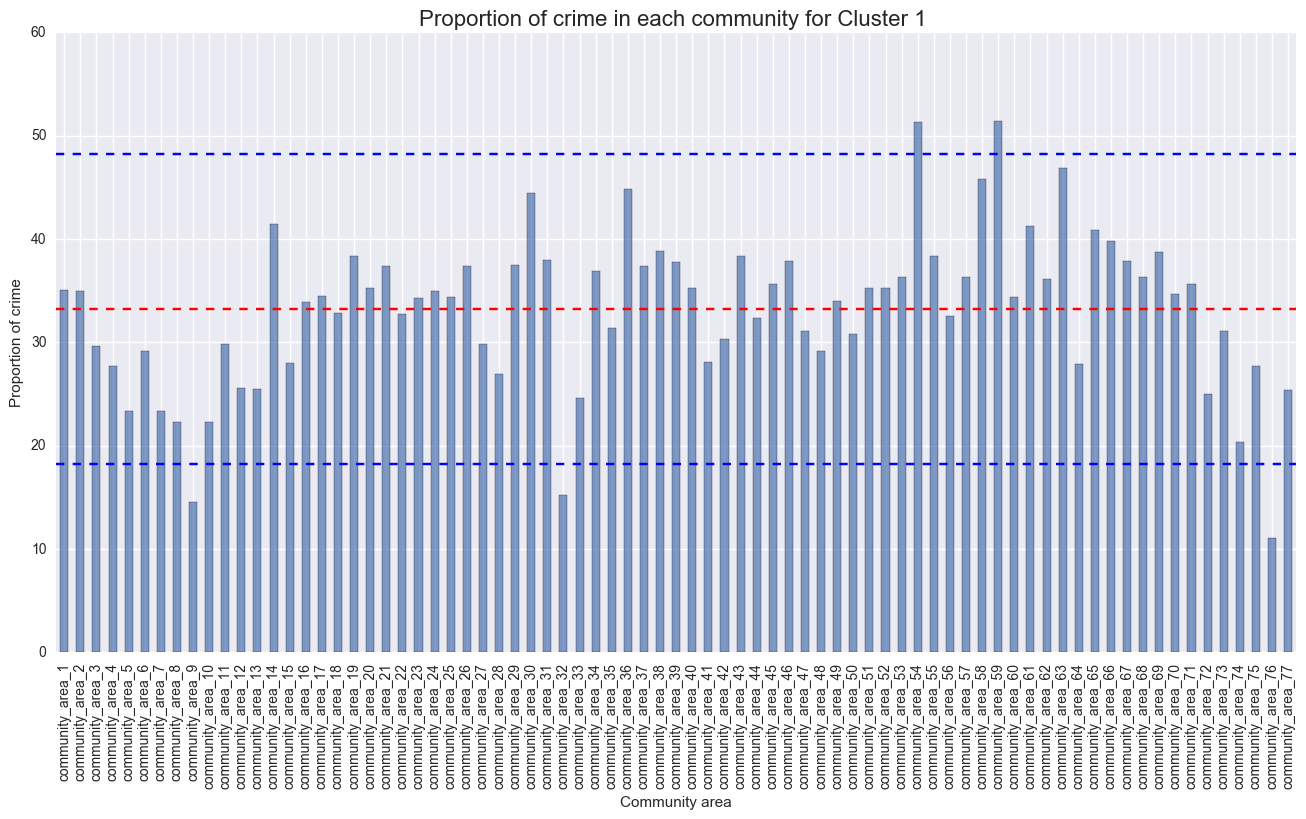

In [46]:
fig=plt.figure(figsize = (30,10))
community.iloc[:,4].plot(figsize=(16,8), kind='bar',\
                            title = 'Spatial distribution of Chicago Crime by community area', alpha=0.7)
plt.axhline((mean[0] - two_sigma[0]), c='b', linestyle = '--')
plt.axhline((mean[0] + two_sigma[0]), c='b', linestyle = '--')
plt.axhline(mean[0],c='r', linestyle = '--' )
plt.xlabel('Community area')
plt.ylabel('Proportion of crime')
plt.title('Proportion of crime in each community for Cluster 1 ', fontsize = 16)
plt.show()

#### Figure 4: Chicago Crime proportion by communities for Cluster 1

In [47]:
Disprop = community[community.Cluster0 > (mean[0] + two_sigma[0])]
Disprop.iloc[:,4]

community_area_54    51.338671
community_area_59    51.465913
Name: Cluster0, dtype: float64

In [48]:
data4[(data4['Community Area Number'] == 54) | (data4['Community Area Number'] == 59) ]

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
53,54,Riverdale,1182874.405,1818033.127,5.8,56.5,34.6,27.5,51.5,8201,24.031849,1194
58,59,McKinley Park,1163984.329,1881505.368,7.2,18.7,13.4,32.9,35.6,16954,10.558449,988


#### For the Cluster 0 the two communities - Riverdale and Mckinley Park are outliers. The % of households below poverty is 56%, and % of vacant housing is also high for Riverdale, whereas McKinley Park has high % of housing crowded.  

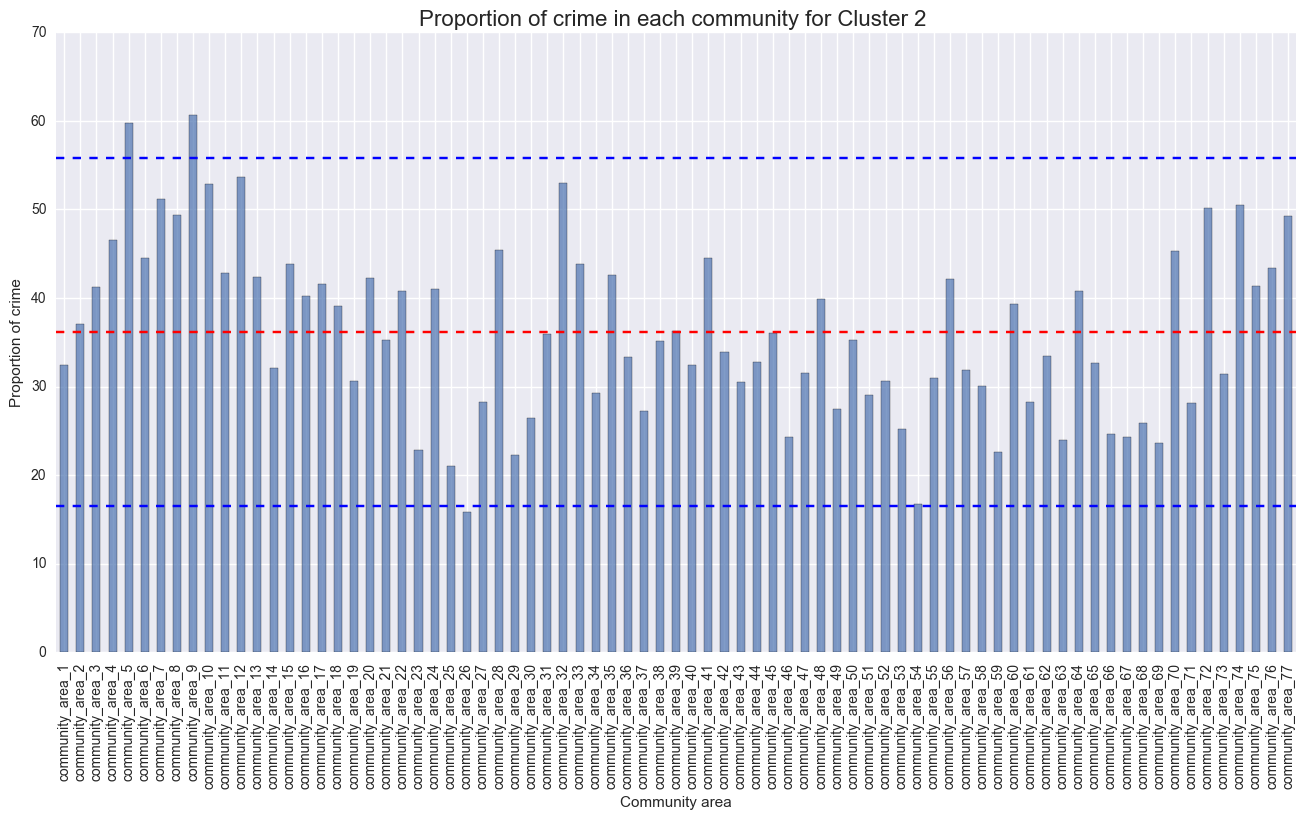

In [49]:
fig=plt.figure(figsize = (30,10))
community.iloc[:,5].plot(figsize=(16,8), kind='bar',\
                            title = 'Spatial distribution of Chicago Crime by community area', alpha=0.7)
plt.axhline((mean[1] - two_sigma[1]), c='b', linestyle = '--')
plt.axhline((mean[1] + two_sigma[1]), c='b', linestyle = '--')
plt.axhline(mean[1],c='r', linestyle = '--' )
plt.xlabel('Community area')
plt.ylabel('Proportion of crime')
plt.title('Proportion of crime in each community for Cluster 2 ', fontsize = 16)
plt.show()

#### Figure 5: Chicago Crime proportion by communities for Cluster 2

In [50]:
Disprop2 = community[community.Cluster1 > (mean[1] + two_sigma[1])]
Disprop2.iloc[:,5]

community_area_5    59.730575
community_area_9    60.659126
Name: Cluster1, dtype: float64

In [51]:
data4[(data4['Community Area Number'] == 5) | (data4['Community Area Number'] == 9) ]

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
4,5,North Center,1161104.228,1924056.010,0.3,7.5,5.2,4.5,26.2,57123,10.100636,1280
8,9,Edison Park,1125542.283,1945199.392,1.1,3.3,6.5,7.4,35.3,40959,4.794521,283


#### The two communities disproportionate in cluster 1 are North Center and Edison Park. North Center has high number of crimes and high % of vacant housing units, whereas Edison Park has high overcrowding, high % of unemployment in people aged 16+ and low per capita income. 

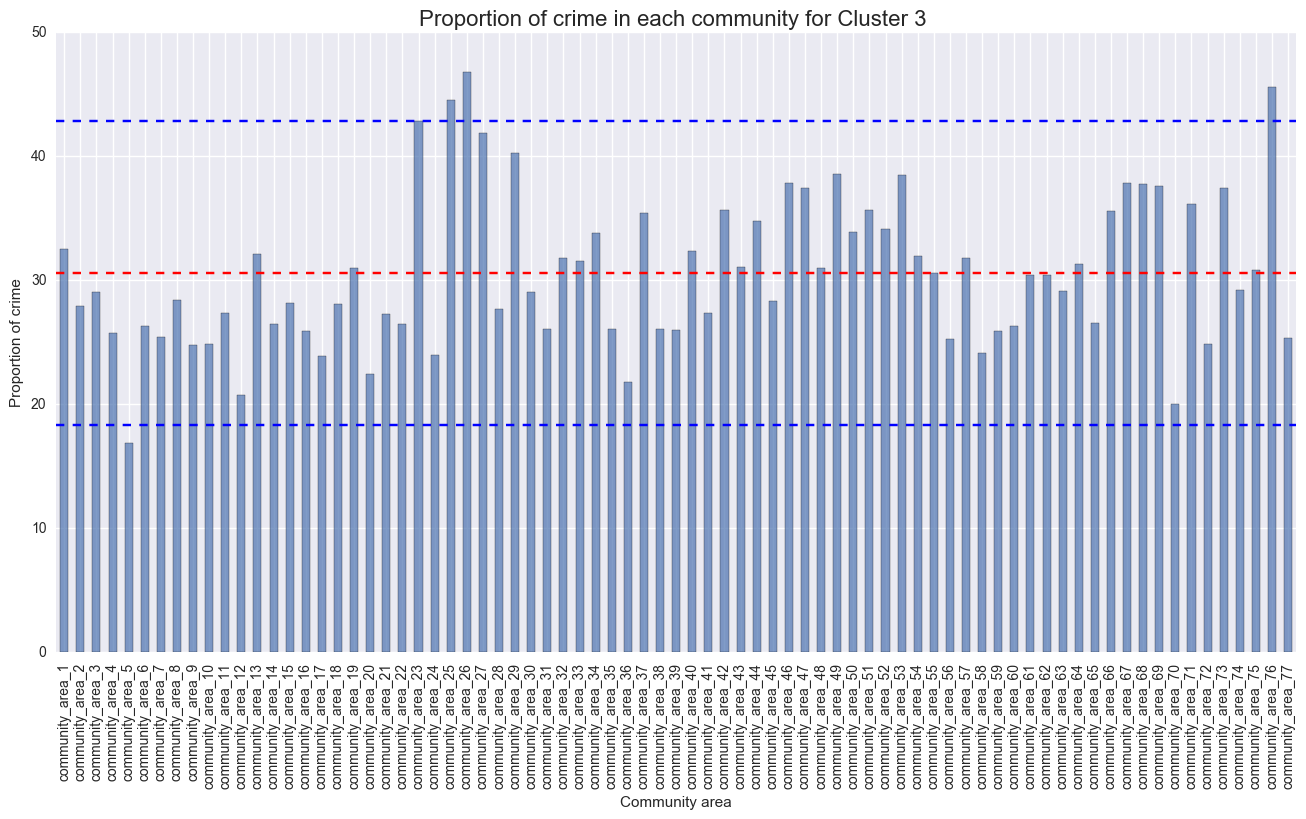

In [52]:
fig=plt.figure(figsize = (30,10))
community.iloc[:,6].plot(figsize=(16,8), kind='bar',\
                            title = 'Spatial distribution of Chicago Crime by community area', alpha=0.7)
plt.axhline((mean[2] - two_sigma[2]), c='b', linestyle = '--')
plt.axhline((mean[2] + two_sigma[2]), c='b', linestyle = '--')
plt.axhline(mean[2],c='r', linestyle = '--' )
plt.xlabel('Community area')
plt.ylabel('Proportion of crime')
plt.title('Proportion of crime in each community for Cluster 3 ', fontsize = 16)
plt.show()

#### Figure 6: Chicago Crime proportion by communities for Cluster 3

In [53]:
Disprop3 = community[community.Cluster2 > (mean[2] + two_sigma[2])]
Disprop3.iloc[:,6]

community_area_23    42.877950
community_area_25    44.574867
community_area_26    46.832943
community_area_76    45.609046
Name: Cluster2, dtype: float64

In [54]:
data4[(data4['Community Area Number'] == 23) | (data4['Community Area Number'] == 25) | 
     (data4['Community Area Number'] == 26) | (data4['Community Area Number'] == 76)]

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
22,23,Humboldt park,1151216.159,1906926.141,14.8,33.9,17.3,35.4,38.0,13781,15.839488,7522
24,25,Austin,1140839.462,1903174.321,6.3,28.6,22.6,24.4,37.9,15957,14.188517,15719
25,26,West Garfield Park,1148754.852,1898785.758,9.4,41.7,25.8,24.5,43.6,10934,27.504936,5340
75,76,O`Hare,1106851.170,1934484.285,3.6,15.4,7.1,10.9,30.3,25828,8.237232,1395


#### The four communities disproportinate in Cluster 2 are Humboldt Park, Austin, West Garfield Park, O'Hare.  Austin has the highest crimes reported, high unemployment rate and low education levels. 

### f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5 pts)

In [55]:
data3[['crime_type', 'Category', 'cluster_label']].head()

,crime_type,Category,cluster_label
0,ARSON: BY FIRE,P1P,0
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,P1V,2
4,ASSAULT: AGGRAVATED: OTHER FIREARM,P1V,0


In [56]:
data3[['Category', 'cluster_label']][data3.cluster_label == 0]['Category'].value_counts()

P2     25
P1V    22
P1P     6
Name: Category, dtype: int64

In [57]:
data3[['Category', 'cluster_label']][data3.cluster_label == 1]['Category'].value_counts()

P2    13
Name: Category, dtype: int64

In [58]:
data3[['Category', 'cluster_label']][data3.cluster_label == 2]['Category'].value_counts()

P2     42
P1P     9
P1V     2
Name: Category, dtype: int64

- It can be observed from the given data, the proportion of P2 (less serious crime) is common to every cluster. 

- The P1V crime (serious violent crime) is found in cluster 0 and 2 but the proportion in cluster 2 is very low. 

- The P1P crime (property crime) is found in cluster 0 and 2 with around similar proportion of about 10-15% of all the types of crime within that cluster. 

- Cluster 0 and 2 have similar proportions of crime types. 

- The K-means clustering does not correspond to the FBI's crime categories, it only correspond for cluster 1 but fails for other two cluster.


### g) For part g, you will use the same dataset to compare the clusters produced by several different methods. But this time you should cluster using only the day-of-week (not hour-of-day) attributes. Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric. In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify). For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings. (20 pts)

In [59]:
data_week = data3.iloc[:,2:9]
data_week.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat
0,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972
1,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185
2,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776
3,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000
4,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275


### K-Means Clustering 

In [60]:
# using Silhouette method to calculate the number of clusters
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state= 324)
    cluster_labels = km.fit_predict(data_week)
    silhouette_avg = silhouette_score(data_week, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.2349670398022403
For n_clusters =3, the average silhouette_score is :0.2328593052264759
For n_clusters =4, the average silhouette_score is :0.21069067164506372
For n_clusters =5, the average silhouette_score is :0.15322351417352373
For n_clusters =6, the average silhouette_score is :0.17024288003160876
For n_clusters =7, the average silhouette_score is :0.1733534845636119
For n_clusters =8, the average silhouette_score is :0.18421200842187166
For n_clusters =9, the average silhouette_score is :0.1376440134161604


#### From the above silhoutte scores the optimal value is at 3 clusters. 

In [61]:
n=3 # number of clusters

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res1=km.fit(data_week)
#result.
print(res1.labels_)

[2 1 1 2 1 2 0 2 1 2 1 1 1 1 1 1 1 1 1 0 1 2 2 2 2 2 1 2 2 2 0 1 2 2 2 2 0
 0 0 2 2 0 0 0 0 1 1 2 2 1 2 1 1 1 2 1 2 2 0 2 2 0 2 0 1 2 2 2 0 2 2 1 2 2
 1 0 2 2 0 2 2 0 2 2 2 2 2 1 0 2 2 2 0 0 2 2 1 2 2 1 2 2 2 1 0 2 2 2 2 2 2
 2 1 2 2 1 2 1 2]


In [62]:
print("The number of elements in cluster 1 is ", len(res1.labels_[res1.labels_ == 0]))
print("The number of elements in cluster 2 is ", len(res1.labels_[res1.labels_ == 1]))
print("The number of elements in cluster 3 is ", len(res1.labels_[res1.labels_ == 2]))

The number of elements in cluster 1 is  21
The number of elements in cluster 2 is  33
The number of elements in cluster 3 is  65


### Guassian Mixture Model

In [64]:
from sklearn.mixture import GaussianMixture

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, random_state=1134)
    clusterer.fit(data_week)
    cluster_labels = clusterer.predict(data_week)
    silhouette_avg = silhouette_score(data_week, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.25672726757
For n_clusters = 3 The average silhouette_score is : 0.281320894177
For n_clusters = 4 The average silhouette_score is : 0.10952054126
For n_clusters = 5 The average silhouette_score is : 0.110533414176
For n_clusters = 6 The average silhouette_score is : 0.105071027279
For n_clusters = 7 The average silhouette_score is : 0.119134104656
For n_clusters = 8 The average silhouette_score is : 0.0840414039295
For n_clusters = 9 The average silhouette_score is : 0.0884315305537
For n_clusters = 10 The average silhouette_score is : 0.112441106685


#### From the above silhoutte scores the optimal value is at 3 clusters.

In [67]:
# Guassian Mixture:
n = 3
GM=GaussianMixture(n_components=n, random_state= 1134)
GM.fit(data_week)
res_Mix = GM.predict(data_week)
res_Mix

array([1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1])

In [68]:
print("The number of elements in cluster 1 is ", len(res_Mix[res_Mix == 0]))
print("The number of elements in cluster 2 is ", len(res_Mix[res_Mix == 1]))
print("The number of elements in cluster 3 is ", len(res_Mix[res_Mix== 2]))

The number of elements in cluster 1 is  16
The number of elements in cluster 2 is  85
The number of elements in cluster 3 is  18


### Bottom-up hierarchical clustering with "single link" distance metric

In [69]:
X = np.array(data_week)
Z = linkage(X, 'single')
Z[:3]

array([[  7.00000000e+00,   7.90000000e+01,   6.68118134e-03,
          2.00000000e+00],
       [  8.90000000e+01,   1.19000000e+02,   7.71772696e-03,
          3.00000000e+00],
       [  1.10000000e+02,   1.14000000e+02,   9.30031238e-03,
          2.00000000e+00]])

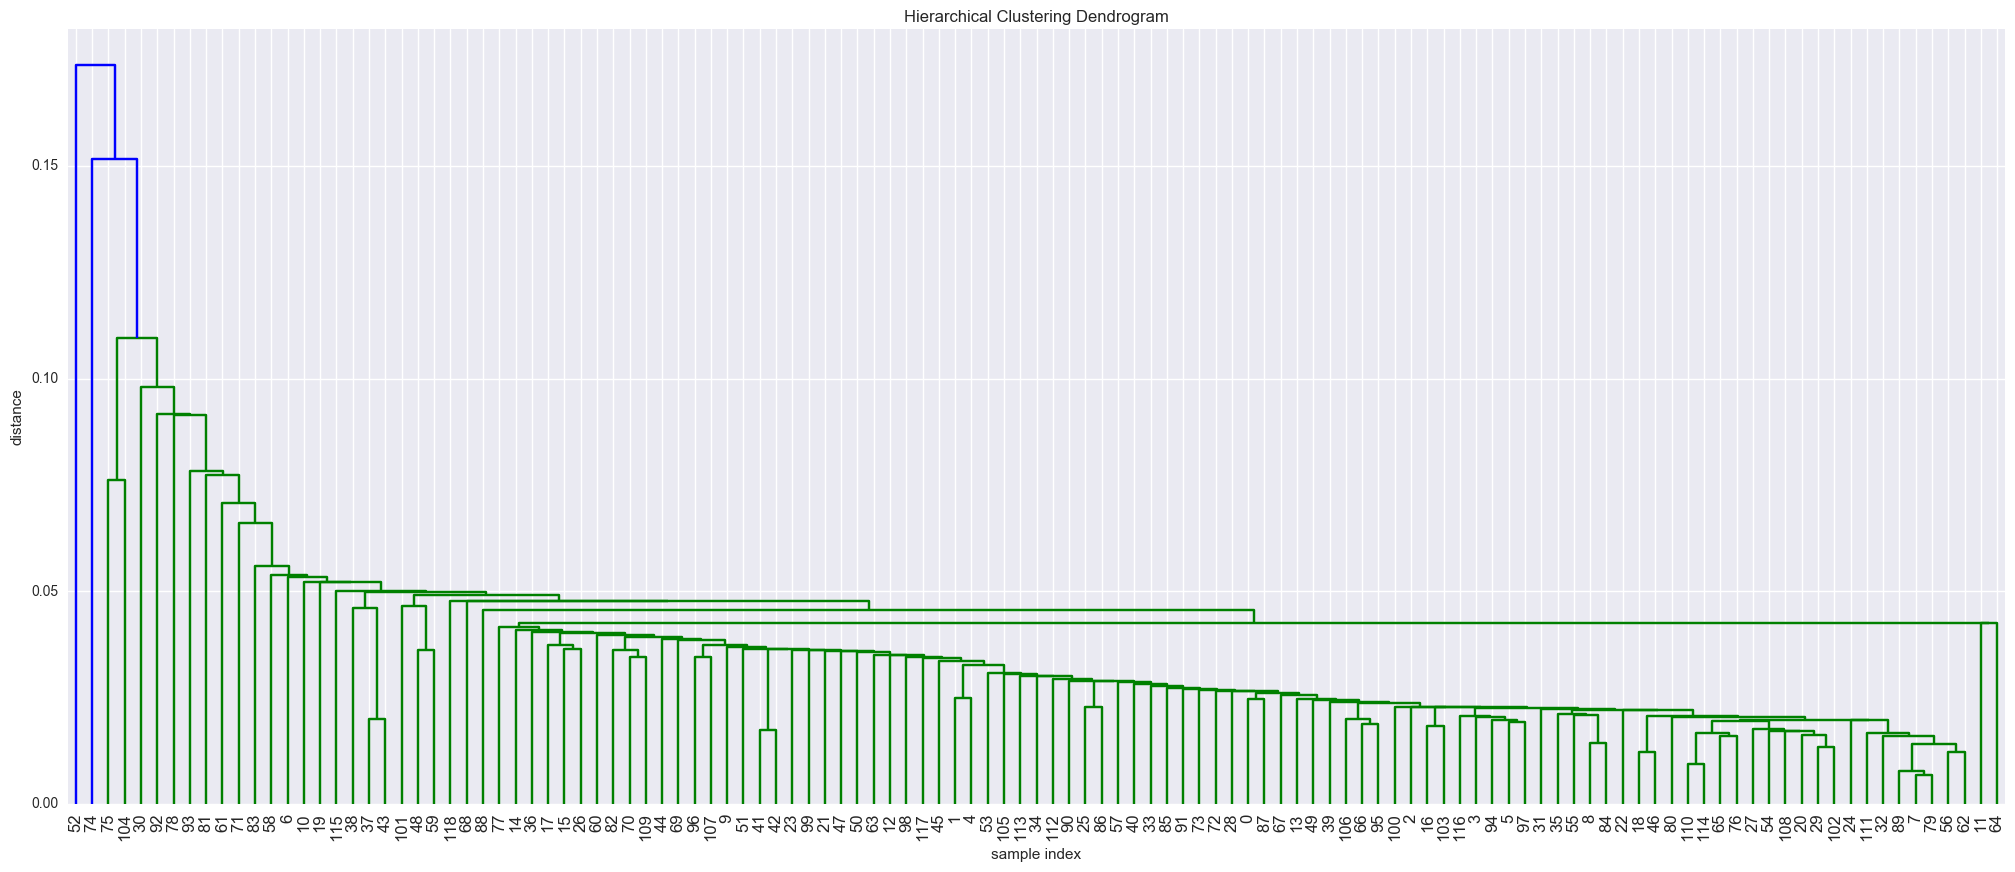

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.show()

### Figure 7: Dendrogram for Single Link Cluster for Chicago Crime proportion

In [71]:
from scipy.cluster.hierarchy import fcluster
res2 = fcluster(Z, 3, criterion='maxclust')
res2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [72]:
print("The number of elements in cluster 1 is ", len(res2[res2 == 1]))
print("the number of elements in cluster 2 is ", len(res2[res2 == 2]))
print("the number of elements in cluster 3 is ", len(res2[res2 == 3]))

The number of elements in cluster 1 is  117
the number of elements in cluster 2 is  1
the number of elements in cluster 3 is  1


### Bottom-up hierarchical clustering with "complete link" distance metric.

In [73]:
Z1 = linkage(X, 'complete')
Z1[:3]

array([[  7.00000000e+00,   7.90000000e+01,   6.68118134e-03,
          2.00000000e+00],
       [  1.10000000e+02,   1.14000000e+02,   9.30031238e-03,
          2.00000000e+00],
       [  8.90000000e+01,   1.19000000e+02,   1.14623810e-02,
          3.00000000e+00]])

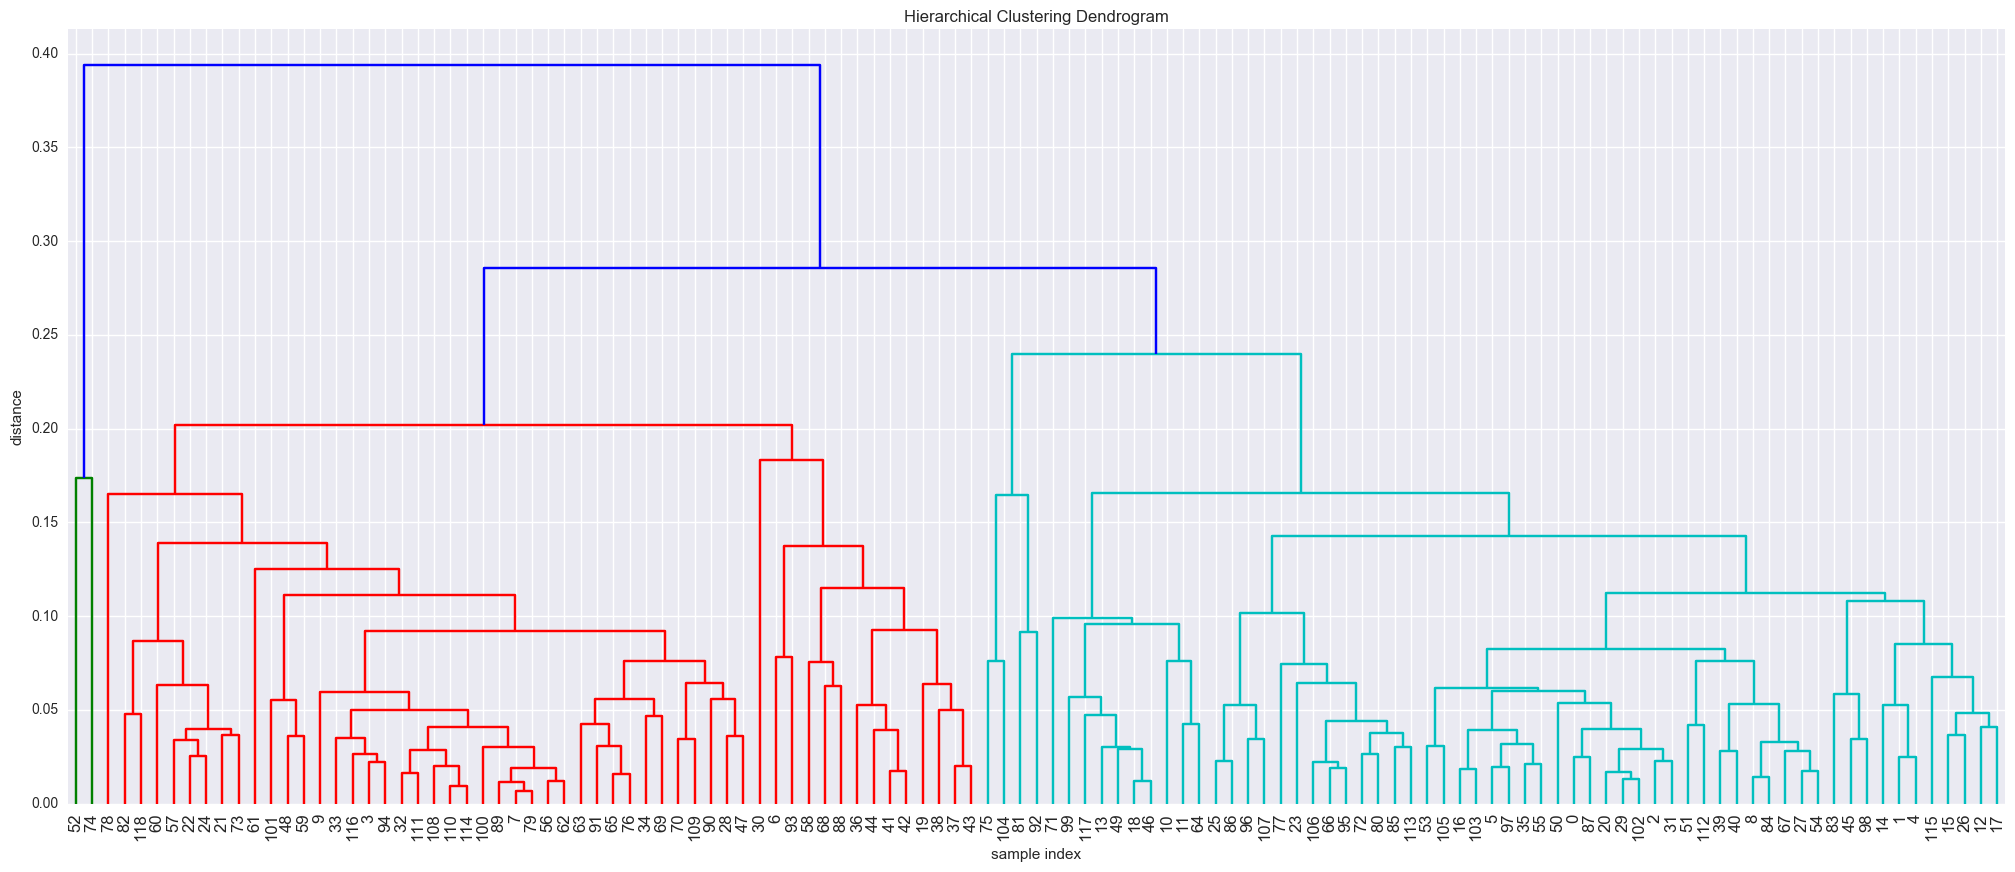

In [74]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z1,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.show()

### Figure 8: Dendrogram of Complete Link Cluster for Chicago Crime proportion

In [75]:
Z1 = linkage(X, 'complete')
res3 = fcluster(Z1, 3, criterion='maxclust') #using maxclust and defining the number of clusters =3
res3

array([3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2,
       3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3,
       3, 2, 2, 3, 3, 3, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2,
       2, 2, 3, 3, 2, 1, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2,
       3, 2, 3, 2], dtype=int32)

In [76]:
print("the number of elements in cluster 1 is ", len(res3[res3 == 1]))
print("the number of elements in cluster 2 is ", len(res3[res3 == 2]))
print("the number of elements in cluster 3 is ", len(res3[res3 == 3]))

the number of elements in cluster 1 is  2
the number of elements in cluster 2 is  54
the number of elements in cluster 3 is  63


#### It can observed that the K-Mean Clustering and the Guassian Mixture Model are similar whereas Single Link and Complete Link are similar. These similarities are due to the way the partitioning of the data is done, for K-mean the distance metric is centriod and for single and complete links the distance metric used is euclidean. 
#### Thus the dissimilarity is bound to be seen in K-means and Single or Complete Link clsutering. 
#### However, single link clustering allows to use only 2 clusters(cluster 2 = 1 element) while complete link allows three clusters with only 2 elements in one cluster. The approach here is based on distance but calculated differently. this is reasonable because of their circular nature.